In [201]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pandas as pd

In [202]:
'''
Central assumptions:
-binary class label
-log-odds are a linear combination of the features
Aim:
-gradient descent to find model parameters which minimize misclassification
Specific example:
-predict whether individual will buy a magazine or not, based on social network data
'''

'\nCentral assumptions:\n-binary class label\n-log-odds are a linear combination of the features\nAim:\n-gradient descent to find model parameters which minimize misclassification\nSpecific example:\n-predict whether individual will buy a magazine or not, based on social network data\n'

In [203]:
#LOAD DATA
df = pd.read_csv("iris.csv", names = ["sepal length", "sepal width", "petal length", "petal width", "species"])
df = df[df.species != "Iris-virginica"]
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


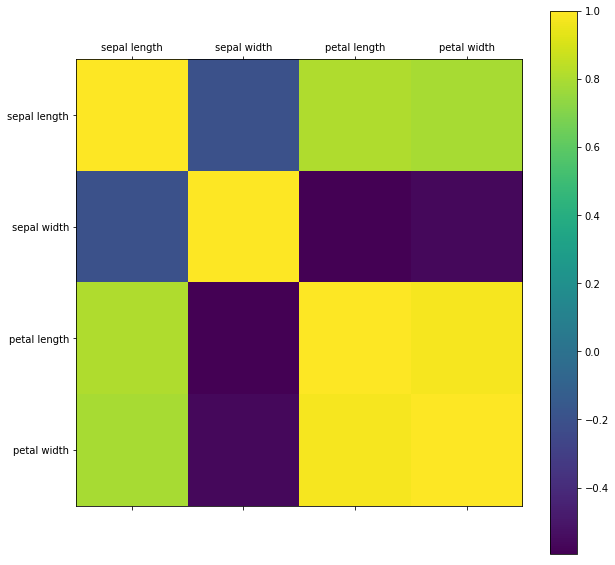

In [204]:
#CORRELATION HEATMAP: USE TO SELECT INDEPENDENT VARIABLES FOR MODEL:
fig, ax = plt.subplots(figsize = (10, 10))
ax.matshow(df.corr()) #plot correlation heat map for 4x4 combinations of variables
ax.set_xticklabels([""]+["sepal length", "sepal width", "petal length", "petal width"])
ax.set_yticklabels([""]+["sepal length", "sepal width", "petal length", "petal width"])
fig.colorbar(ax.matshow(df.corr()))
plt.show()

In [205]:
#CONVERT CATEGORICAL VARIABLE TO NUMERICAL LABELS
df["species"] = df["species"].astype('category')
df["species_cat"] = df["species"].cat.codes
df.head()

,sepal length,sepal width,petal length,petal width,species,species_cat
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [206]:
#SPLIT INTO TRAINING AND TEST DATA:
bitmask = np.random.randn(len(df)) < 0.85 
train = df[bitmask]
test = df[~bitmask]

train_size = len(train)
test_size = len(test)

In [207]:
#LOGISTIC REGRESSION MODEL:
class LogisticRegression:
    #INITIALIZE WITH LEARNING RATE AND NUMBER OF ITERATIONS
    def __init__(self, lr=0.01, iters = 10):
        self.lr = lr
        self.iters = iters
    
    #LOGISTIC FUNCTION USED TO PREDICT CLASS
    def sigmoid(self, z):
        sigmoid = 1/ (1 + np.exp(-z))
        return sigmoid

    #CALCULATE CROSS-ENTROPY LOSS    
    def x_entropy(self, y_hat, y):
        loss = -y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)
        return loss

    #UPDATE MODEL PARAMS: MINIMIZE CROSS-ENTROPY LOSS
    def update_weights(self, X, y_hat, y, learning_rate):
        self.W -= np.dot(X.T, learning_rate * (y_hat - y))
        self.b -= learning_rate * (y_hat - y)
    
    #FIT MODEL TO TRAINING DATA
    def fit(self, X, y, get_loss = False):
        
        self.W, self.b = np.zeros(X.shape[1]), 0 #INITIALIZE WEIGHTS: fit to data shape
        loss = [] #list to store value of loss function at each step
        
        for i in range(self.iters):
            for feat, lab in zip(X, y): #STOCHASTIC GRADIENT DESCENT: "online"
                
                dot_prod = np.dot(feat, self.W) + self.b #calculate dot product of features and weight vectors
                y_hat = self.sigmoid(dot_prod) #calculate logistic function with dot product as argument
                self.update_weights(feat, y_hat, lab, self.lr) #update model weights
                if get_loss:
                    loss.append(self.x_entropy(y_hat, lab)) #calculate x_entropy and store to visualize
                
        if get_loss:
            return loss
            
    #PREDICT CLASS LABELS FOR TEST DATA
    def predict(self, X):
        dot_prod = np.dot(X, self.W) + self.b
        y = np.round(self.sigmoid(dot_prod))
        
        return y

In [208]:
features = ["sepal length", "petal length"]
reg_model = LogisticRegression()
loss = reg_model.fit(np.array(train.loc[:, features]), np.array(train.loc[:, "species_cat"]), get_loss = True)
y_pred = reg_model.predict(np.array(test.loc[:, features]))

In [209]:
print(sum(y_pred != test.loc[:, "species_cat"])) #total number of errors in classification

0


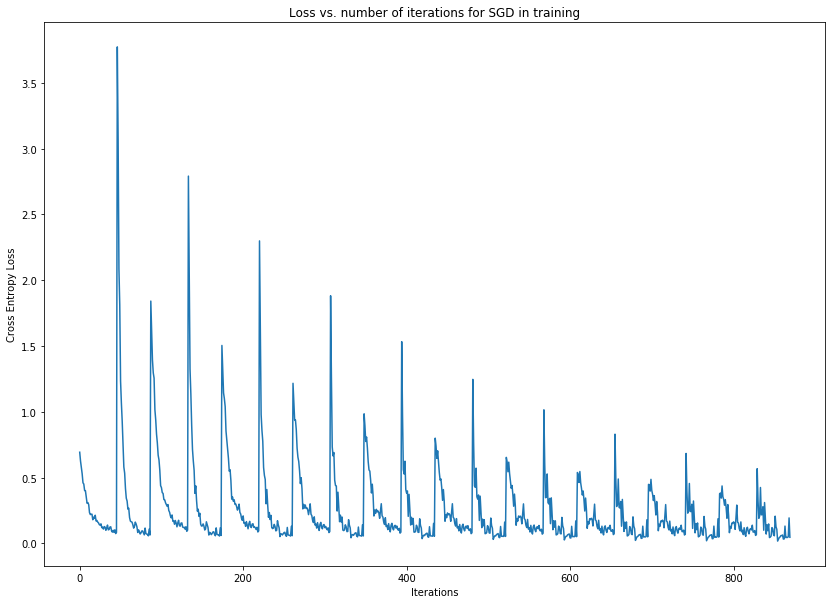

In [210]:
x = np.arange(len(loss))
fig, ax = plt.subplots(figsize = (14, 10))
ax.set_title("Loss vs. number of iterations for SGD in training")
ax.set_xlabel("Iterations")
ax.set_ylabel("Cross Entropy Loss")
ax.plot(x, loss)
plt.show()